# Evaluation Project -
Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('global-power-plant-database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
#Checking No of rows and columns
df.shape

(907, 27)

In [6]:
#finding some more informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We have more null values present in this dataset and more categorical column present in this data set.

In [7]:
#Finding stastical information of the dataset
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


here .describe shows the mean,counts ,min,max,quantile values of each column of numerical values. there are so many missing values are present in the dataset we have 15 numerical and 12 objects columns Each feature has difference scale range it show min,max and std

# Data Cleansing

In [8]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

we have country_long,country,other_fuel2,year_of_capacity_data and generation_data_source are unique values if we dontwant we can do drop it.

In [10]:
sum(df.duplicated())

0

In [11]:
#Checking null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

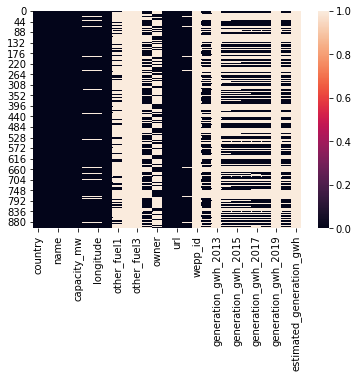

In [12]:
#Checking the null values with heatmap
sns.heatmap(df.isnull())

oh there are bulk of null values to solve in a datset Now separate numeric and categorical variables

In [13]:
num_col=df.select_dtypes(include=[np.number])
cat_col=df.select_dtypes(exclude=[np.number])


In [14]:
num_col.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
other_fuel3                 907
commissioning_year          380
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

see seperated missing null numerical columns

"other_fuel3","wepp_id","estimated_generation_gwh" has no values at all so we can drop these columns

In [16]:
num_col=num_col.drop(columns=["other_fuel3","wepp_id","estimated_generation_gwh"],axis=1)
num_col

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill the null values with mean() and mode() values

year_of_capacity_data is a one unique value we can do drop it

In [17]:
num_col=num_col.drop(columns=['year_of_capacity_data'],axis=1)

In [27]:
num_col['generation_gwh_2013']=num_col['generation_gwh_2013'].fillna(num_col['generation_gwh_2013'].mean())

In [28]:
num_col['latitude'] = num_col['latitude'].fillna(num_col['latitude'].mode()[0])

num_col['longitude'] = num_col['longitude'].fillna(num_col['longitude'].mode()[0])

num_col['commissioning_year'] = num_col['commissioning_year'].fillna(num_col['commissioning_year'].mode()[0])

num_col['generation_gwh_2014'] = num_col['generation_gwh_2014'].fillna(num_col['generation_gwh_2014'].mean())

num_col['generation_gwh_2015'] = num_col['generation_gwh_2015'].fillna(num_col['generation_gwh_2015'].mean())

num_col['generation_gwh_2016'] = num_col['generation_gwh_2016'].fillna(num_col['generation_gwh_2016'].mean())

num_col['generation_gwh_2017'] = num_col['generation_gwh_2017'].fillna(num_col['generation_gwh_2017'].mean())

num_col['generation_gwh_2018'] = num_col['generation_gwh_2018'].fillna(num_col['generation_gwh_2018'].mean())



In [29]:
num_col['generation_gwh_2019'] = num_col['generation_gwh_2019'].fillna(num_col['generation_gwh_2019'].mean())

Mode is used when the data having more occurences of more frequent value here top 4 columns are frequent values And one more thing Mode also replace with categorical values only now we have null values of categorical too now let's do that before we check our after treated nullvalues filled or not

In [31]:
#Checking the null values after treating
num_col.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
commissioning_year       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

In [32]:
num_col=num_col.drop(columns=['generation_gwh_2013','generation_gwh_2019'],axis=1)
num_col

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,28.1839,2011.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,24.7663,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,21.9038,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,23.8712,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,21.9603,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,16.2949,2016.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,12.8932,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,15.2758,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,24.3500,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [15]:
cat_col.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
primary_fuel                0
other_fuel1               709
other_fuel2               906
owner                     565
source                      0
url                         0
geolocation_source         19
generation_data_source    458
dtype: int64

here also other_fuel1,other_fuel2 has looking two columns are more null values so, we dropping this 2 columns. next here two more columns are differenames but in two columns has same values country and country_long columns then do now drop country column name,owner,url,country,generation_data_sourcehas more unique values and it may affect our model performance and on dropping this,it will not have any much effect on database so drop this columns also

In [33]:
cat_col=cat_col.drop(columns=['other_fuel1','other_fuel2','country','name','owner','url','country_long','generation_data_source'],axis=1)
cat_col

,gppd_idnr,primary_fuel,source,geolocation_source
0,WRI1020239,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,WRI1019881,Coal,Ultratech Cement ltd,WRI
2,WRI1026669,Wind,CDM,WRI
3,IND0000001,Gas,Central Electricity Authority,WRI
4,IND0000002,Coal,Central Electricity Authority,WRI
...,...,...,...,...
902,IND0000513,Coal,Central Electricity Authority,WRI
903,WRI1026222,Solar,Karnataka Power Corporation Limited,Industry About
904,WRI1026776,Wind,CDM,WRI
905,WRI1019901,Coal,Hindustan Zinc ltd,WRI


In [34]:
#find the missing values using mode
cat_col['geolocation_source']=cat_col['geolocation_source'].fillna(cat_col['geolocation_source'].mode()[0])



look here our categorical columns are filled null values lets check

In [35]:
cat_col.isnull().sum()

gppd_idnr             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [36]:
cat_col.head()

,gppd_idnr,primary_fuel,source,geolocation_source
0,WRI1020239,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,WRI1019881,Coal,Ultratech Cement ltd,WRI
2,WRI1026669,Wind,CDM,WRI
3,IND0000001,Gas,Central Electricity Authority,WRI
4,IND0000002,Coal,Central Electricity Authority,WRI


look here our data looks in categorical columns now data we will convert into numerical data.

so now do change categorical into numerical using labelencoder method

In [37]:
df1=pd.concat([num_col,cat_col],axis=1)
df1.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,source,geolocation_source
0,2.5,28.1839,28.1839,2011.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,WRI1020239,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,24.7663,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,WRI1019881,Coal,Ultratech Cement ltd,WRI
2,39.2,21.9038,21.9038,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,WRI1026669,Wind,CDM,WRI
3,135.0,23.8712,23.8712,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,IND0000001,Gas,Central Electricity Authority,WRI
4,1800.0,21.9603,21.9603,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,IND0000002,Coal,Central Electricity Authority,WRI


In [38]:
df1['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

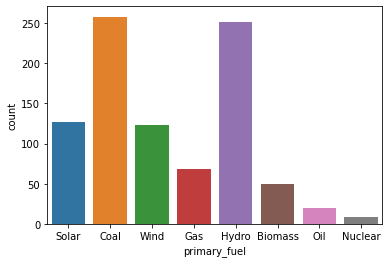

In [39]:
#lets visualize the count of target variable using seabor
sns.countplot(df1['primary_fuel'])

In the above plot, we can see that most of the primary fuel in power plant is coal and hydro are in 250 count and least one is nuclear.

And here observe our target varaible data is imbalaced

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col=cat_col.apply(le.fit_transform)


In [41]:
cat_col.head()

,gppd_idnr,primary_fuel,source,geolocation_source
0,657,6,109,1
1,519,1,174,2
2,853,7,21,2
3,0,2,22,2
4,1,1,22,2


In [42]:
df1 = pd.concat([num_col,cat_col],axis = 1)
df1

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,source,geolocation_source
0,2.5,28.1839,28.1839,2011.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,657,6,109,1
1,98.0,24.7663,24.7663,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,519,1,174,2
2,39.2,21.9038,21.9038,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,853,7,21,2
3,135.0,23.8712,23.8712,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,0,2,22,2
4,1800.0,21.9603,21.9603,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1,1,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,16.2949,2016.0,2431.823590,0.994875,233.596650,865.400000,686.500000,491,1,22,2
903,3.0,12.8932,12.8932,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,822,6,77,0
904,25.5,15.2758,15.2758,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,891,7,21,2
905,80.0,24.3500,24.3500,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,539,1,59,2


In [43]:
df1.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
gppd_idnr                int32
primary_fuel             int32
source                   int32
geolocation_source       int32
dtype: object

see all our data converted into numerical

In [44]:
df1.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,source,geolocation_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.086467,21.086467,2004.594267,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,453.000000,3.206174,43.847850,1.733186
std,590.085456,6.098262,6.098262,15.734928,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,261.972645,2.280652,44.642818,0.677151
min,0.000000,8.168900,8.168900,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,17.072000,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,226.500000,1.000000,22.000000,2.000000
50%,59.200000,21.281800,21.281800,2014.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,453.000000,3.000000,22.000000,2.000000
75%,385.250000,25.176450,25.176450,2015.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,679.500000,6.000000,29.500000,2.000000
max,4760.000000,34.649000,34.649000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,906.000000,7.000000,190.000000,2.000000


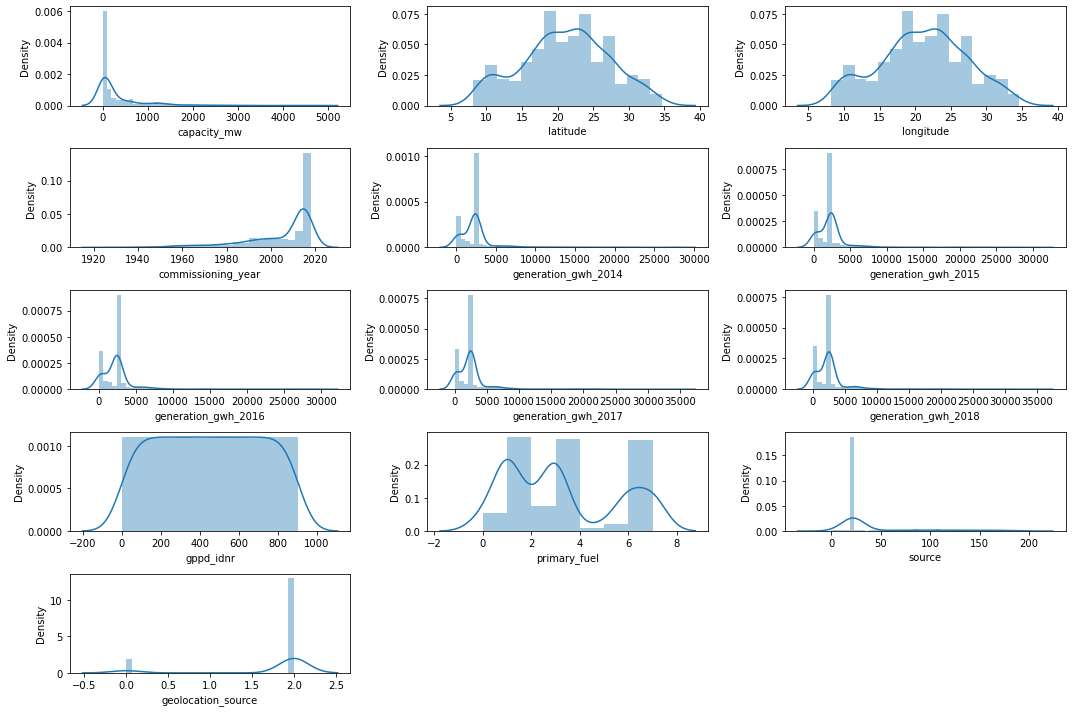

In [45]:
#how data distributed every column by visualization
plt.figure(figsize=(15,10))
plotnumber = 1
for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
        
        
    plotnumber+=1
plt.tight_layout()





Here data is not normally distributed most of the columns has outliers

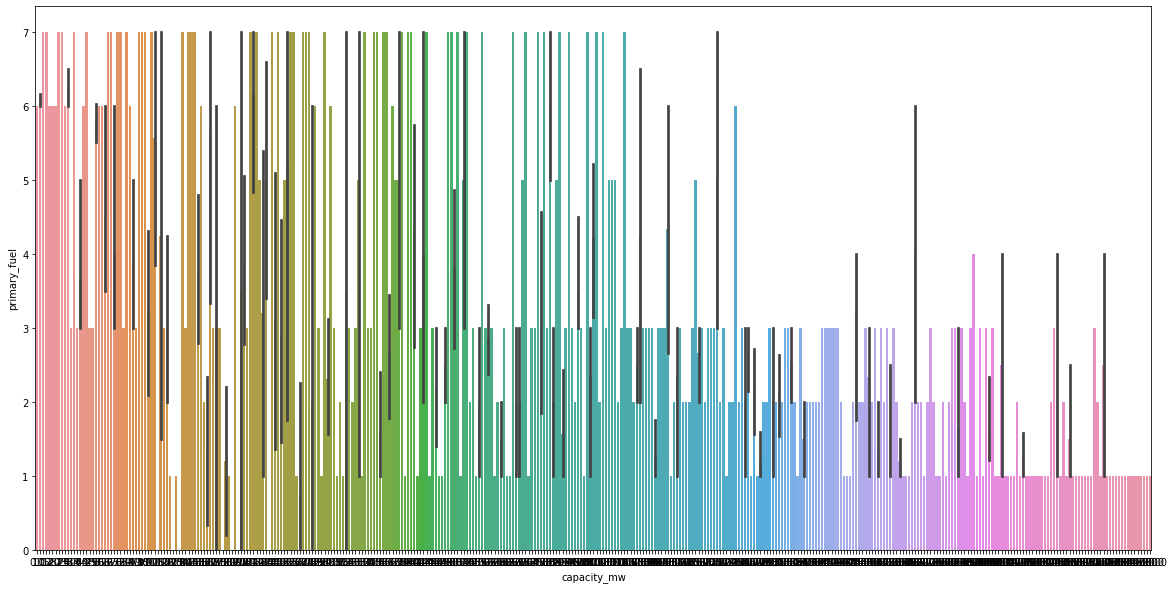

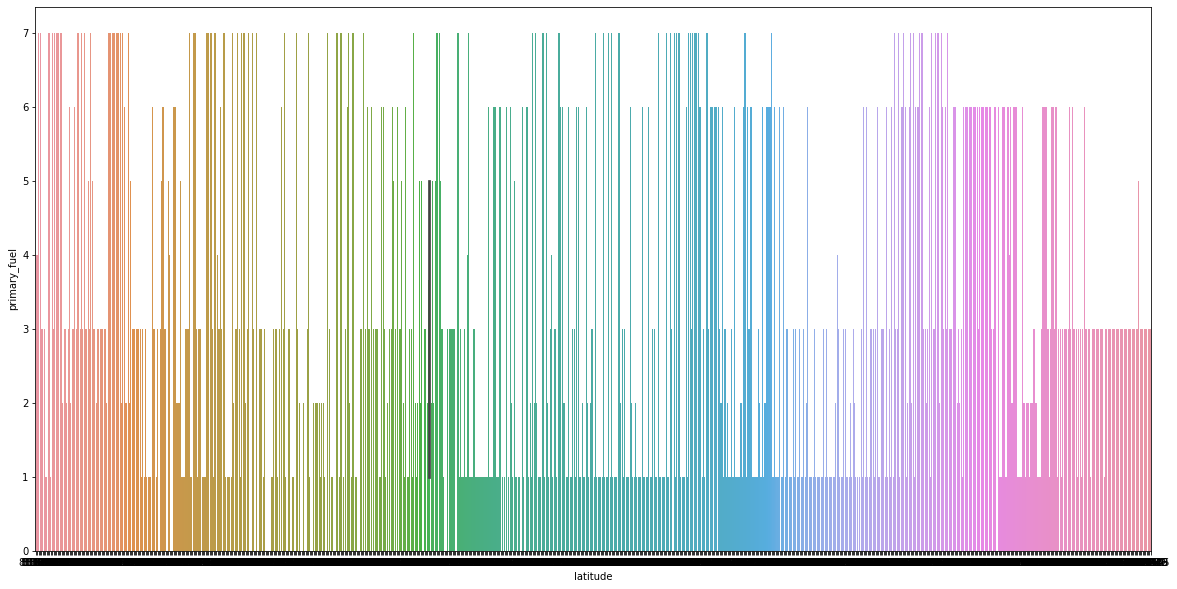

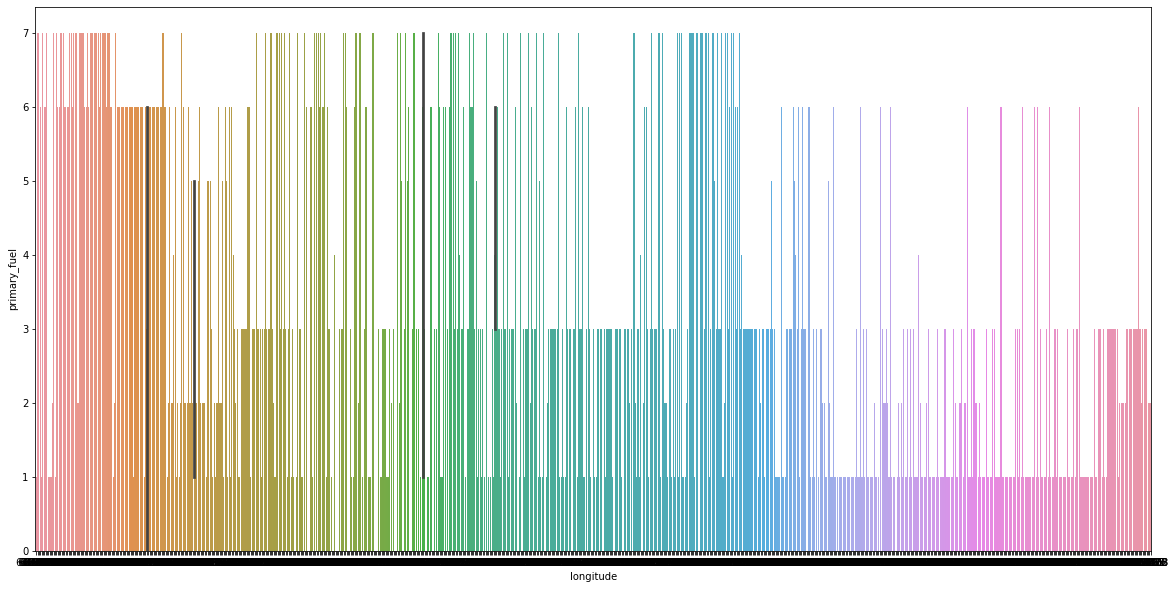

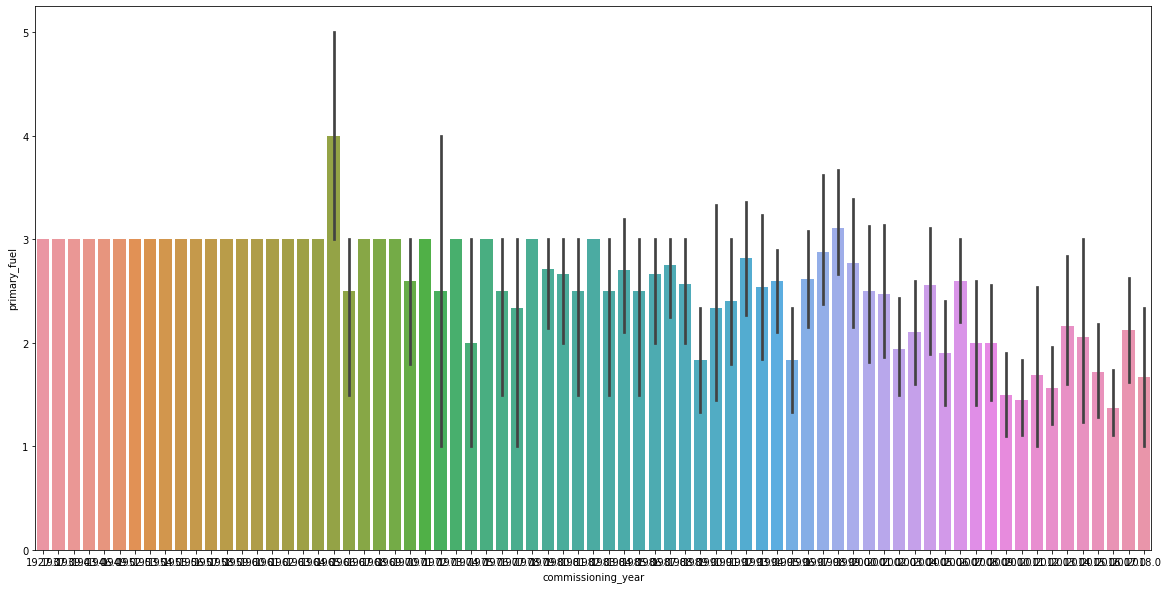

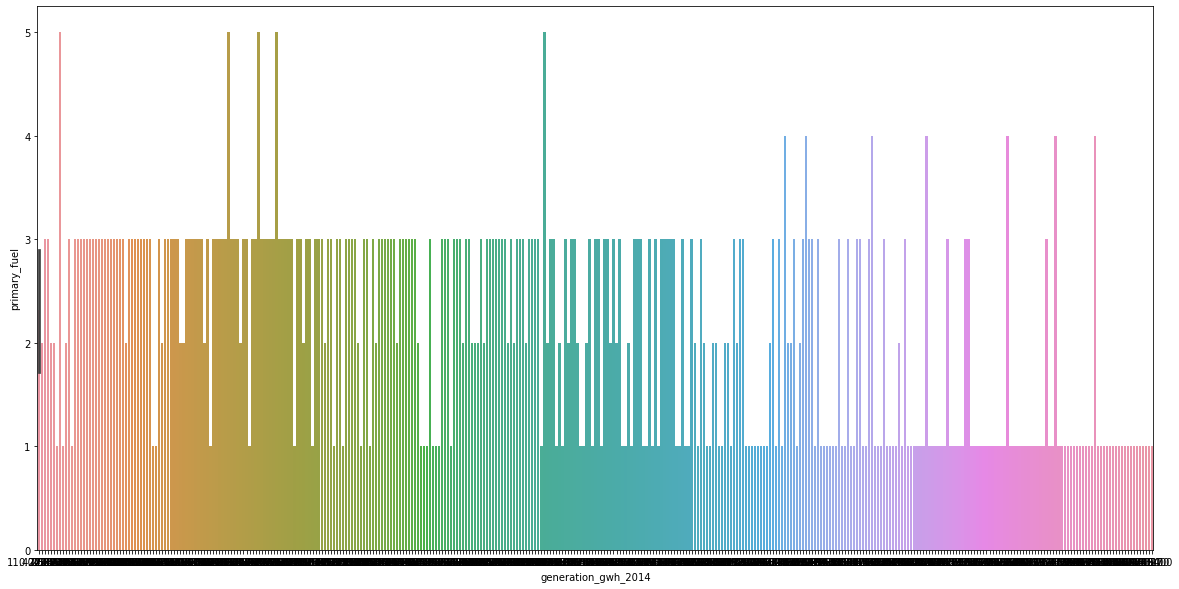

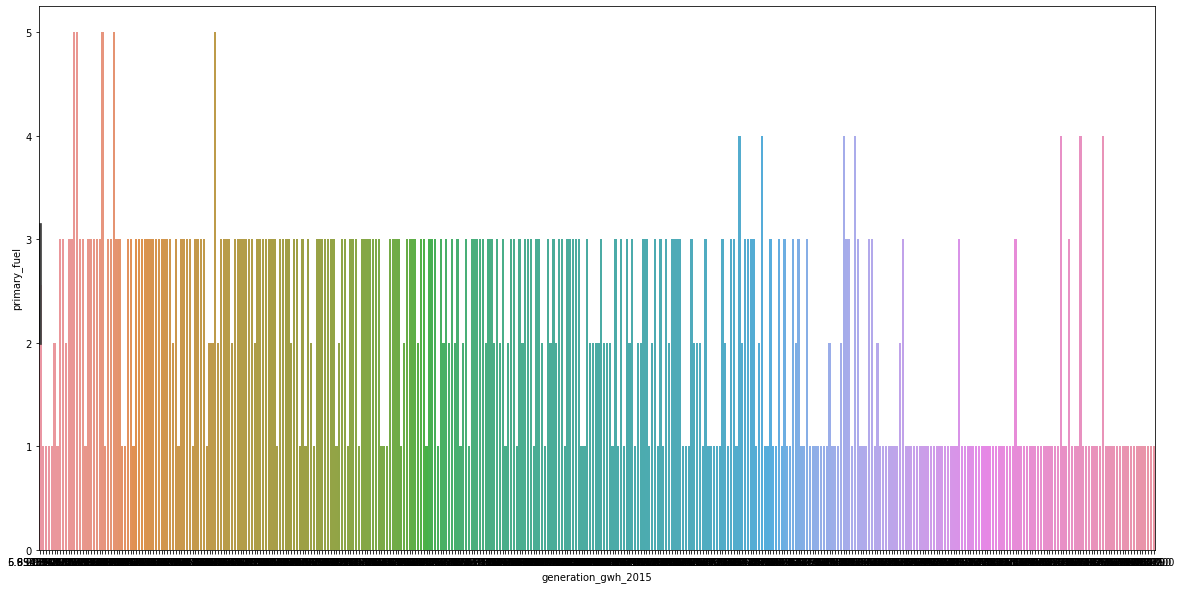

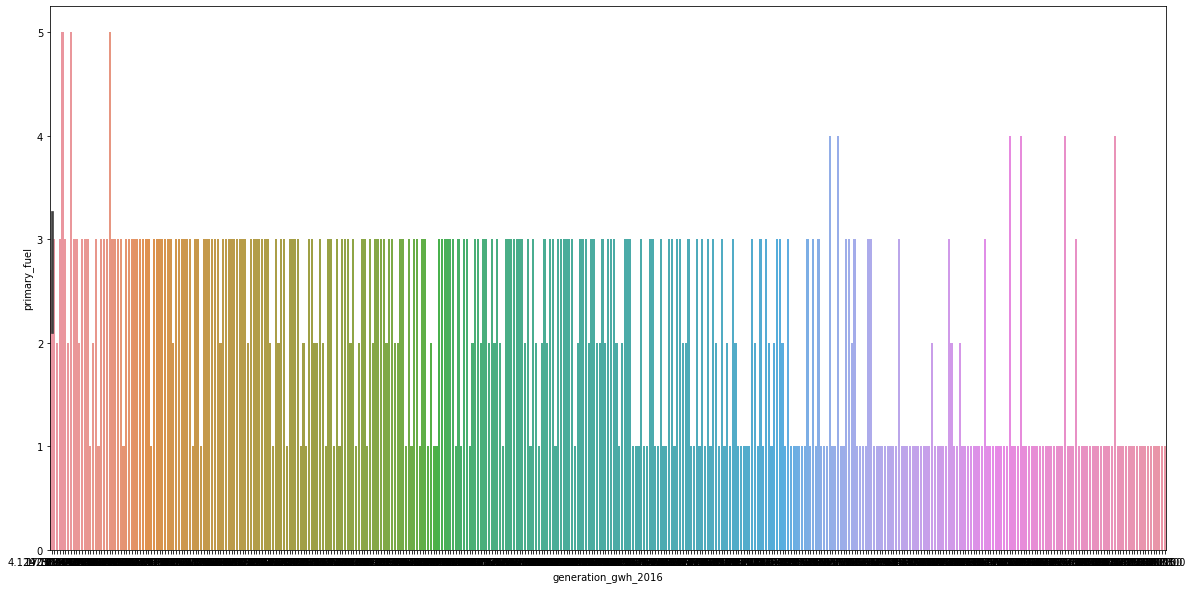

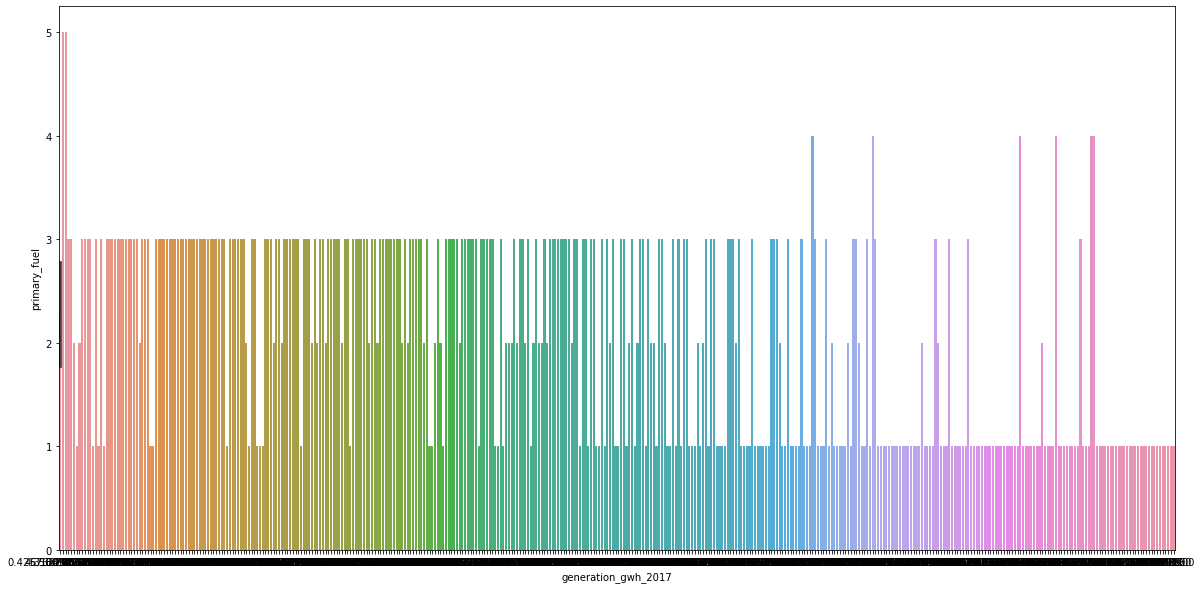

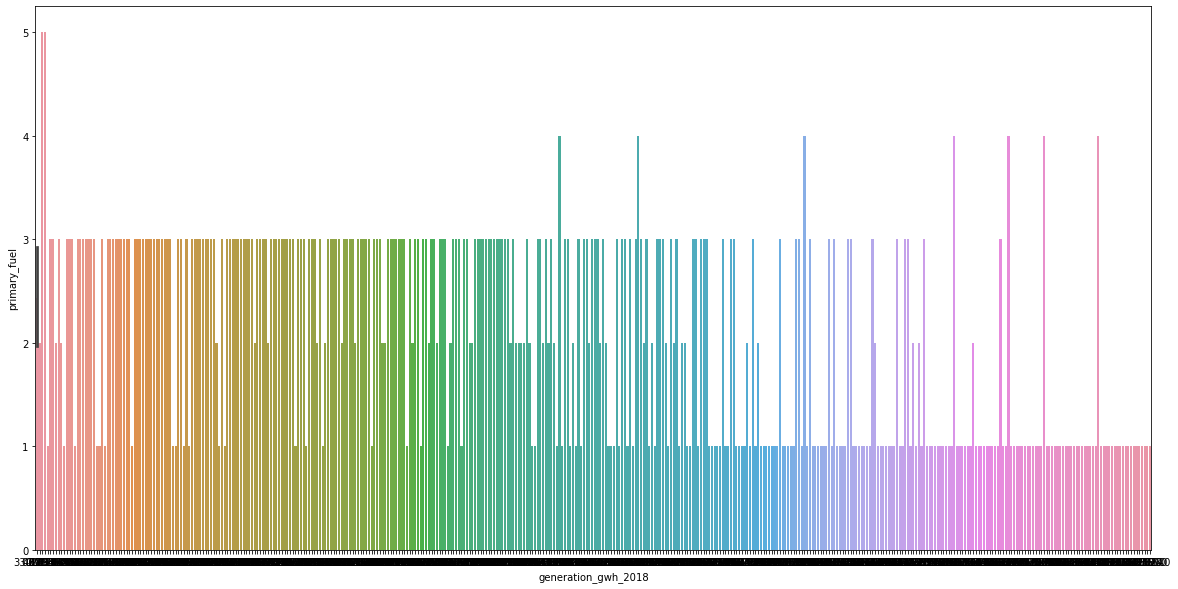

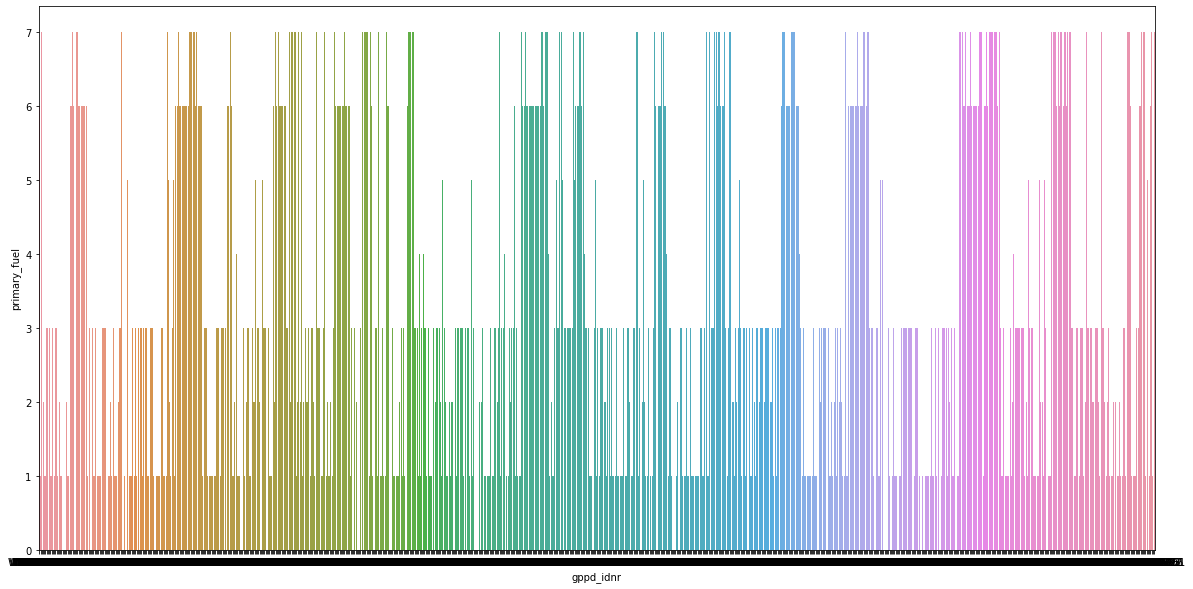

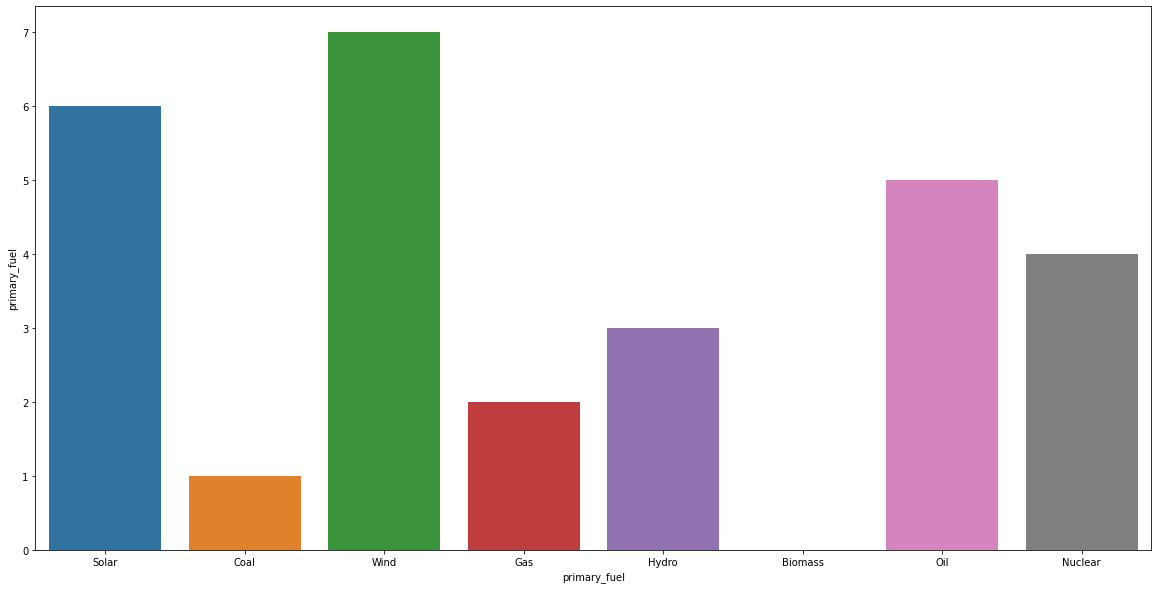

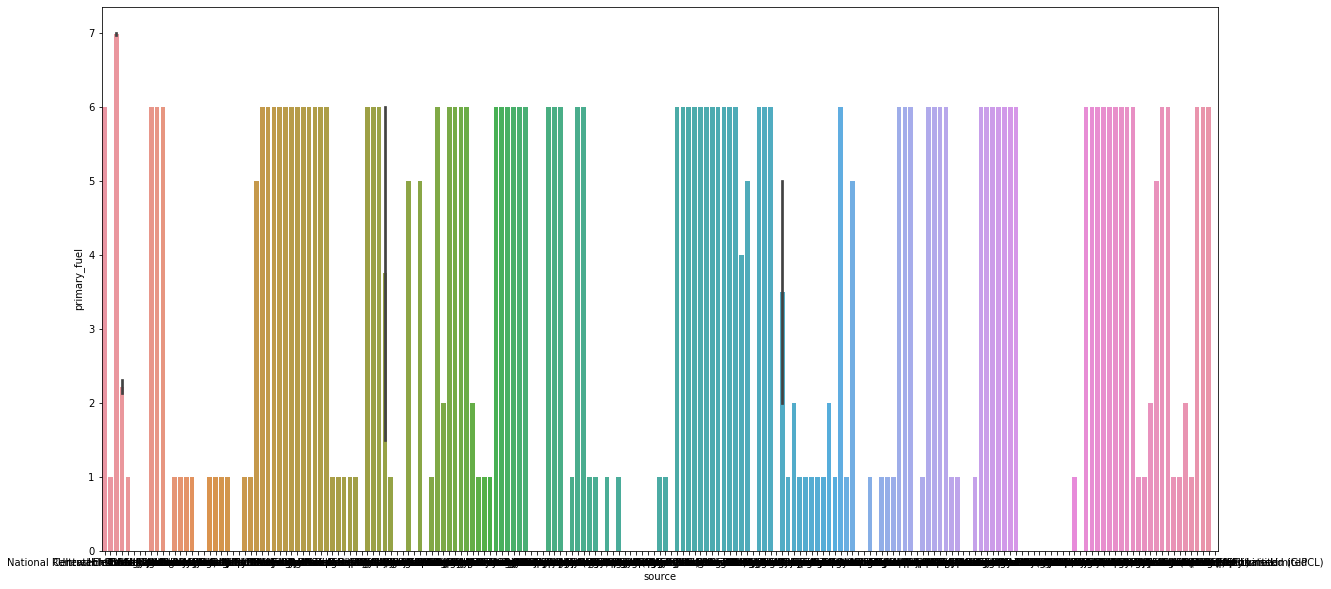

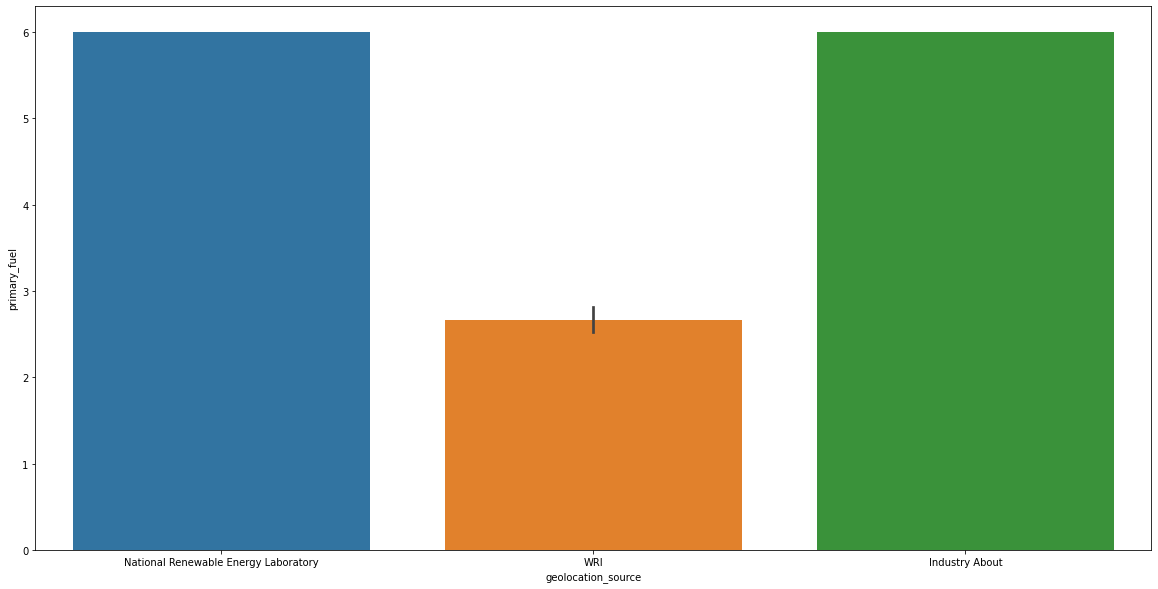

In [46]:
#Runs relation with dataset
for i in df1.columns:
    plt.figure(figsize=(20,10))
    sns.barplot(x=df[i],y=df1.primary_fuel)


In [48]:
df1.value_counts()

capacity_mw  latitude  longitude  commissioning_year  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  gppd_idnr  primary_fuel  source  geolocation_source
0.00         12.8491   12.8491    2015.0              2431.82359           2428.226946          2467.936859          2547.759305          2600.804099          816        6             166     0                     1
225.00       29.1411   29.1411    2016.0              2431.82359           2428.226946          477.657100           546.823000           401.811000           494        2             22      2                     1
161.00       9.6266    9.6266     1960.0              524.92220            502.256100           93.440450            285.664500           699.485000           317        3             22      2                     1
161.75       27.1858   27.1858    1990.0              569.67400            487.339000           333.180000           306.396000           298

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:title={'center':'gppd_idnr'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

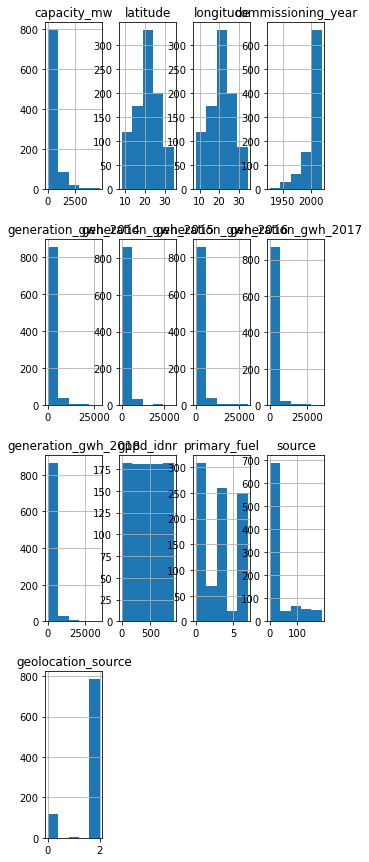

In [49]:
df1.hist(bins=5,figsize=(5,15))

We will plot and see how the data has been distributed using histogram plot here to visualize the data.

"capacity_mw","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","source" has skewness in right side and "commissioning_year" has skewness on left side.

We will treat ouliers.

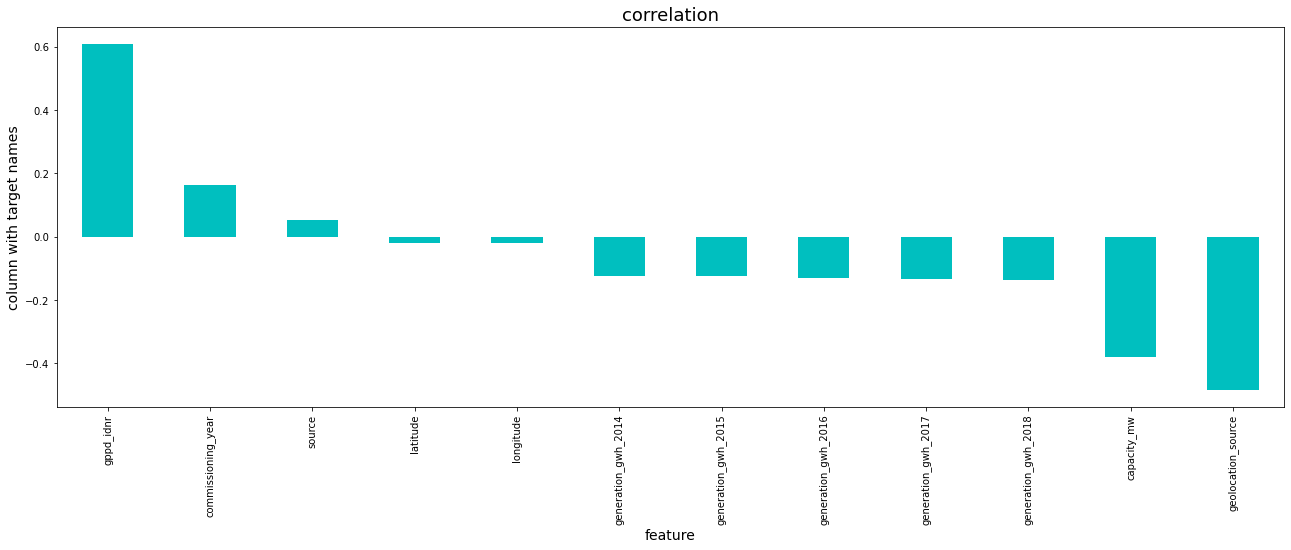

In [50]:
#Visualize correlation
plt.figure(figsize=(22,7))
df1.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()





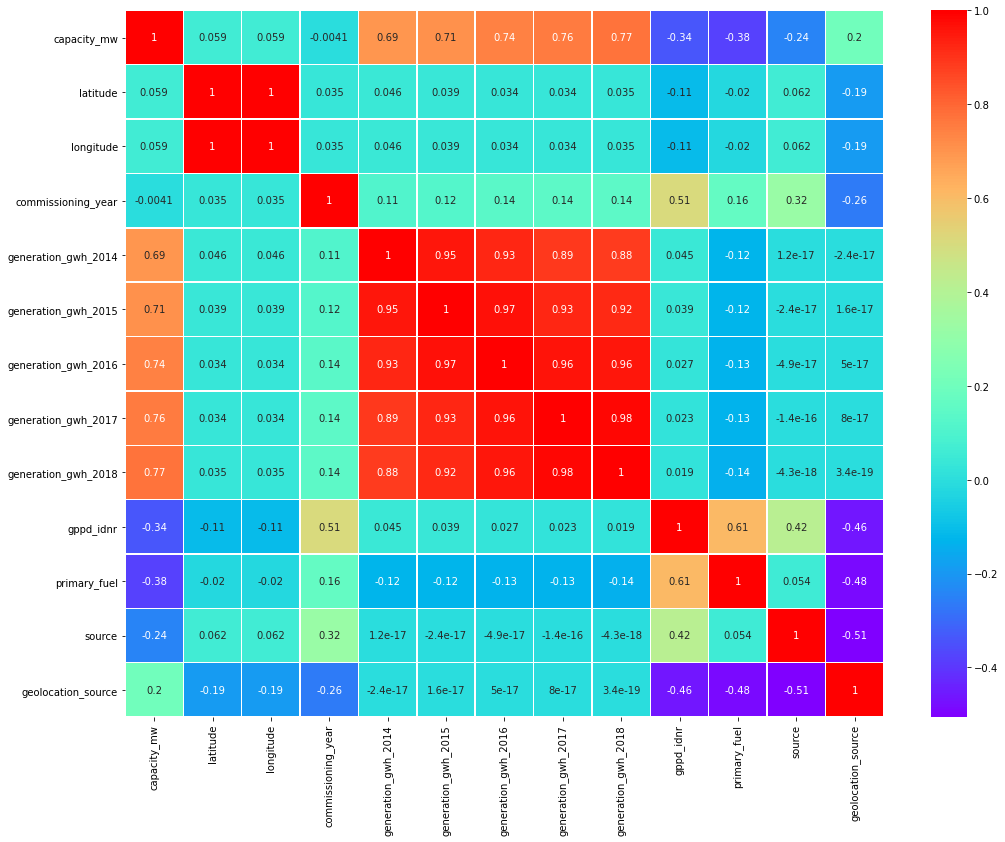

In [51]:
#heatmap
fi,ax=plt.subplots(figsize=(17,13))
sns.heatmap(df1.corr(),cmap='rainbow',annot=True,linewidths=.5,ax=ax)
plt.show()



In [52]:
#separate target and labels
Y= df1['primary_fuel']
X=df1.drop(columns=['primary_fuel'])


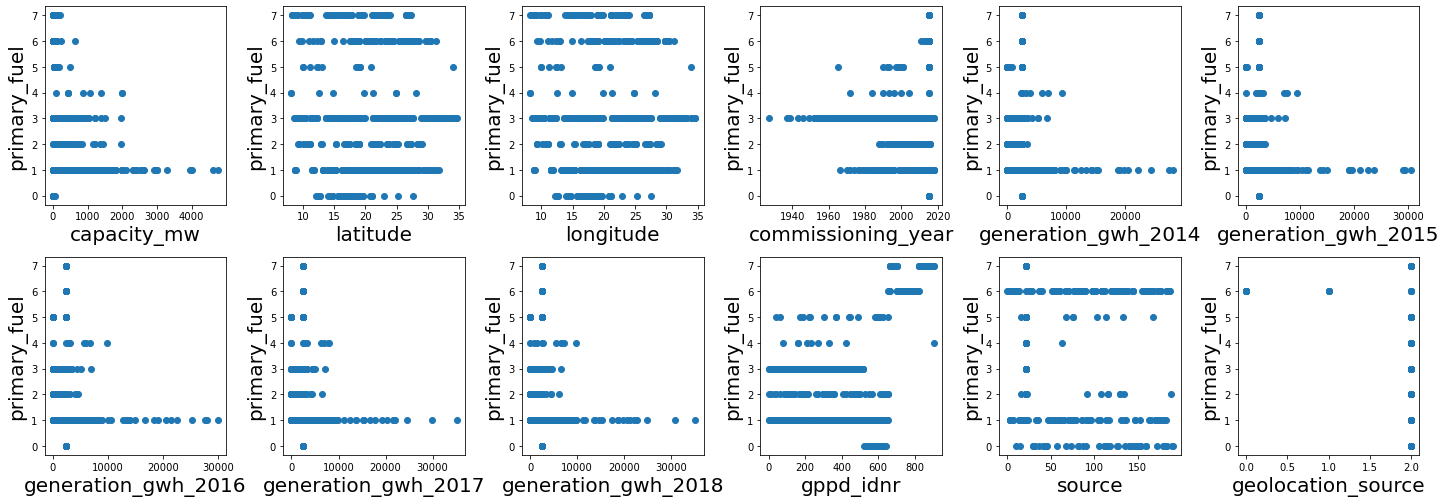

In [58]:

#visulizing relationship
plt.figure(figsize = (20,10))
plotnumber = 1

for column in X:
    if plotnumber<=18:
        ax = plt.subplot(3,6,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('primary_fuel',fontsize = 20)
               
    plotnumber+=1
plt.tight_layout()

In [59]:
num_col.skew()

capacity_mw            3.123576
latitude              -0.095721
longitude             -0.095721
commissioning_year    -1.714873
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

we can see here most of the columns are skewed

Outliers Handling using Box Plot

We applied outliers skewness to numerical data only.

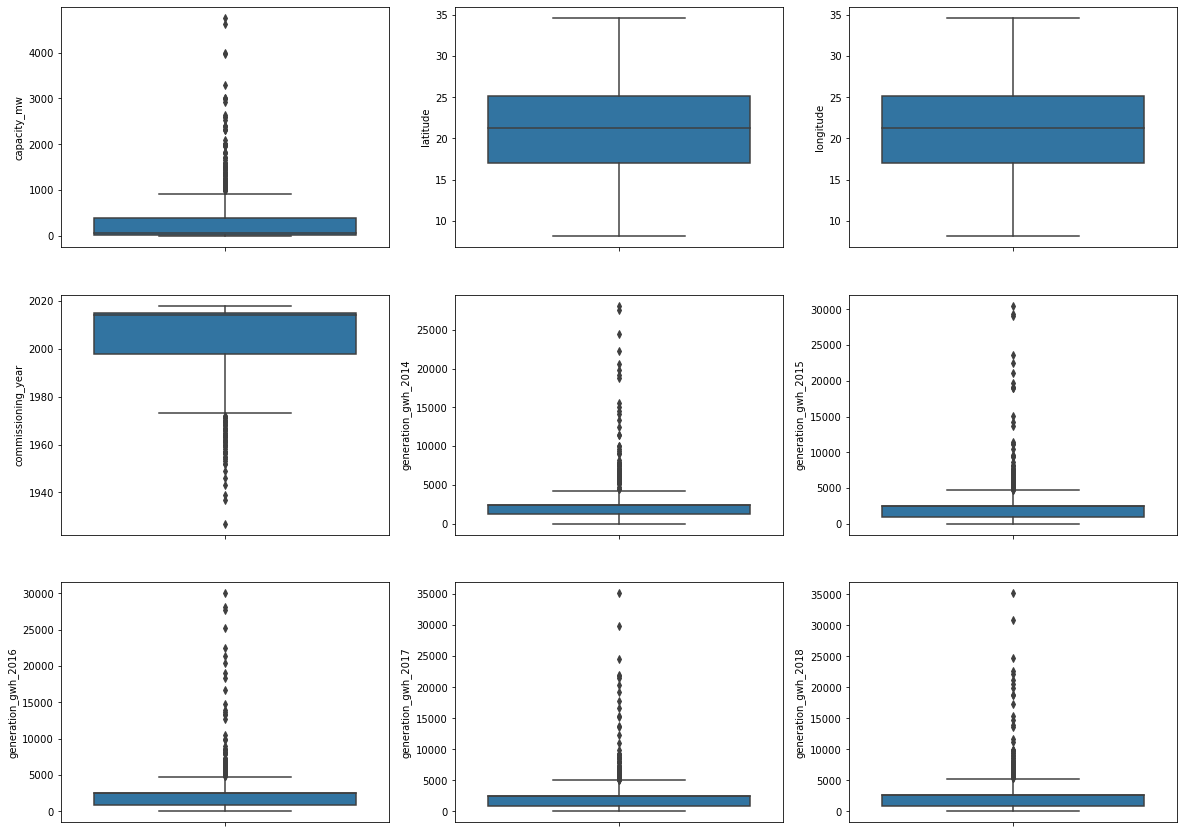

In [61]:
#use boxplot
fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(20,15))
index=0
ax = ax.flatten()

for col, value in num_col.items():
    if col !='type':
        sns.boxplot(y=col,data=num_col,ax=ax[index])
        index+= 1

In [62]:
from scipy.stats import zscore
z=zscore(num_col)
z

array([[-5.48907549e-01,  1.16448733e+00,  1.16448733e+00, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [-3.86977292e-01,  6.03756134e-01,  6.03756134e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [-4.86678853e-01,  1.34101097e-01,  1.34101097e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       ...,
       [-5.09908639e-01, -9.53365659e-01, -9.53365659e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [-4.17498178e-01,  5.35453115e-01,  5.35453115e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [-5.25169082e-01, -1.82973786e+00, -1.82973786e+00, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16]])

In [63]:
thereshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 493, 493, 493, 493, 493,
       493, 494, 494, 494, 494, 494, 494, 648, 648, 648, 648, 648, 648,
       657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695, 695, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808,
       808, 808, 880, 880, 880, 880, 880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 0, 4, 5, 6, 7, 8, 0, 4, 5,
       6, 7, 8, 0, 0, 4, 5, 6, 7, 8, 0, 0, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6,
       7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5,
       6, 8, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 0, 4, 5, 6, 7, 8, 0, 0,
       4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8], dtype=int64))


In [64]:
df_new = num_col [(z<3).all(axis = 1)]


In [65]:
df1.shape


(907, 13)

In [66]:
df_new.shape

(884, 9)

In [67]:
#data loss
(908-858)/908*100

5.506607929515418

here we lossing 6% of data usiing zscore ok lets move to check the skewness and if any skewness more than +-0.5,we will remove it

In [68]:
df_new.skew()

capacity_mw            2.040041
latitude              -0.081189
longitude             -0.081189
commissioning_year    -1.709722
generation_gwh_2014    1.508578
generation_gwh_2015    1.385508
generation_gwh_2016    1.411148
generation_gwh_2017    1.279383
generation_gwh_2018    1.317201
dtype: float64

We can see that most of the columns has skewed and so we apply the power_transform method

In [69]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df_new)
df_new=pd.DataFrame(df_new,columns=num_col.columns)



In [70]:
df_new.skew()

capacity_mw            0.016627
latitude              -0.071586
longitude             -0.071586
commissioning_year    -1.084564
generation_gwh_2014   -0.253122
generation_gwh_2015   -0.308165
generation_gwh_2016   -0.309157
generation_gwh_2017   -0.339708
generation_gwh_2018   -0.348750
dtype: float64

In [71]:
df_new.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.689394,1.159853,1.159853,0.353746,0.356710,0.383316,0.386313,0.388954,0.405331
1,0.242377,0.602359,0.602359,0.736570,0.356710,0.383316,0.386313,0.388954,0.405331
2,-0.260103,0.136300,0.136300,0.736570,0.356710,0.383316,0.386313,0.388954,0.405331
3,0.416289,0.456532,0.456532,-0.237596,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268
4,1.772887,0.145491,0.145491,0.736570,0.691112,1.906185,1.942740,1.576315,2.122732


In [72]:
df2=pd.concat([df_new,cat_col],axis=1)
df2

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,source,geolocation_source
0,-1.689394,1.159853,1.159853,0.353746,0.356710,0.383316,0.386313,0.388954,0.405331,657,6,109,1
1,0.242377,0.602359,0.602359,0.736570,0.356710,0.383316,0.386313,0.388954,0.405331,519,1,174,2
2,-0.260103,0.136300,0.136300,0.736570,0.356710,0.383316,0.386313,0.388954,0.405331,853,7,21,2
3,0.416289,0.456532,0.456532,-0.237596,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268,0,2,22,2
4,1.772887,0.145491,0.145491,0.736570,0.691112,1.906185,1.942740,1.576315,2.122732,1,1,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491,1,22,2
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822,6,77,0
904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891,7,21,2
905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,1,59,2


In [73]:
df2=df2.dropna()
df2=df2.reset_index(drop= True)


In [74]:
df2.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,primary_fuel,source,geolocation_source
0,-1.689394,1.159853,1.159853,0.353746,0.356710,0.383316,0.386313,0.388954,0.405331,657,6,109,1
1,0.242377,0.602359,0.602359,0.736570,0.356710,0.383316,0.386313,0.388954,0.405331,519,1,174,2
2,-0.260103,0.136300,0.136300,0.736570,0.356710,0.383316,0.386313,0.388954,0.405331,853,7,21,2
3,0.416289,0.456532,0.456532,-0.237596,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268,0,2,22,2
4,1.772887,0.145491,0.145491,0.736570,0.691112,1.906185,1.942740,1.576315,2.122732,1,1,22,2


In [75]:
df2.shape

(884, 13)

In [76]:
x = df2.drop(columns = ['primary_fuel'],axis = 1)
y = df2['primary_fuel']

In [77]:
x.shape

(884, 12)

In [78]:
y.shape

(884,)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

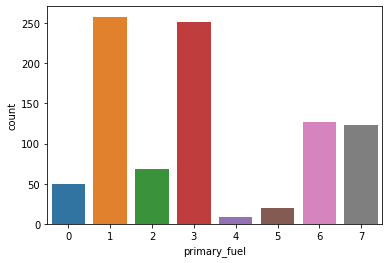

In [79]:
#Let's visualize the count of target variable using seaborn
sns.countplot(df1['primary_fuel'])


We can see that classes are imbalanced and I am using SMOTE() technique to balance the imbalanced dataset,

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

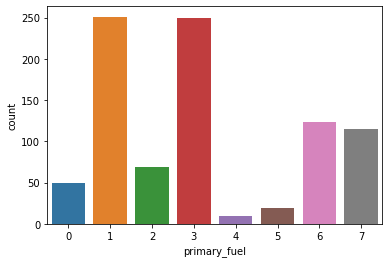

In [80]:
sns.countplot(df2['primary_fuel'])


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)




In [82]:
#convert imbalanced data into balance data
from imblearn.over_sampling import SMOTE
SM =SMOTE()
x, y =SM.fit_resample(x,Y)




<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

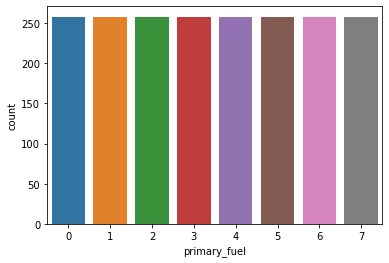

In [83]:
#Now the classes are balance
sns.countplot(y)


We can see that classes are imbalanced and I am using SMOTE() technique to balance the imbalanced dataset,

In [84]:
y.value_counts()

0    258
2    258
4    258
6    258
1    258
3    258
5    258
7    258
Name: primary_fuel, dtype: int64

# MODEL BUILDING

In [91]:


##import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [92]:
#split train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)


In [93]:
#check the shape of train test split
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1651, 12), (413, 12), (1651,), (413,))

In [95]:
#Train result
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_train)
accuracy= classification_report(y_train,y_pred)
print(accuracy)



              precision    recall  f1-score   support

           0       0.86      0.93      0.90       213
           1       0.88      0.61      0.72       202
           2       0.80      0.92      0.86       195
           3       0.96      0.79      0.86       214
           4       0.85      1.00      0.92       195
           5       0.87      0.95      0.90       204
           6       1.00      1.00      1.00       215
           7       0.99      1.00      0.99       213

    accuracy                           0.90      1651
   macro avg       0.90      0.90      0.89      1651
weighted avg       0.90      0.90      0.90      1651



In [97]:
#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        45
           1       0.81      0.52      0.63        56
           2       0.76      0.87      0.81        63
           3       0.90      0.59      0.71        44
           4       0.90      1.00      0.95        63
           5       0.90      0.98      0.94        54
           6       1.00      1.00      1.00        43
           7       0.96      1.00      0.98        45

    accuracy                           0.87       413
   macro avg       0.88      0.87      0.86       413
weighted avg       0.87      0.87      0.86       413



In [98]:
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

Training accuracy:: 0.8994548758328286
Test accuracy:: 0.8692493946731235


In [99]:
print(cross_val_score(KNN,x,y,cv=3).mean())

0.8372093023255814


In [106]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       195
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00       195
           5       1.00      1.00      1.00       204
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       213

    accuracy                           1.00      1651
   macro avg       1.00      1.00      1.00      1651
weighted avg       1.00      1.00      1.00      1651

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       0.80      0.73      0.77        56
           2       0.81      0.86      0.83        63
           3       0.83      0.77      0.80        44
           4       0.97      0.98      0.98        63
           5       0.96 

In [107]:
print("Training accuracy::",RFC.score(x_train,y_train))
print("Test accuracy::",RFC.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.9128329297820823


In [108]:
print(cross_val_score(RFC,x,y,cv=3).mean())

0.8938953488372093


In [109]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)


#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       195
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00       195
           5       1.00      1.00      1.00       204
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       213

    accuracy                           1.00      1651
   macro avg       1.00      1.00      1.00      1651
weighted avg       1.00      1.00      1.00      1651

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.68      0.70      0.69        56
           2       0.76      0.79      0.78        63
           3       0.84      0.70      0.77        44
           4       0.97      0.94      0.95        63
           5       0.93 

In [110]:
print("Training accuracy::",DecisionTree.score(x_train,y_train))
print("Test accuracy::",DecisionTree.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8837772397094431


In [111]:
print(cross_val_score(DecisionTree,x,y,cv=3).mean())

0.8517441860465116


In [112]:
#train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       0.60      0.94      0.73       213
           1       0.64      0.50      0.56       202
           2       0.53      0.51      0.52       195
           3       0.68      0.64      0.66       214
           4       0.74      0.75      0.74       195
           5       0.68      0.46      0.55       204
           6       1.00      0.97      0.99       215
           7       0.94      1.00      0.97       213

    accuracy                           0.73      1651
   macro avg       0.73      0.72      0.71      1651
weighted avg       0.73      0.73      0.72      1651

              precision    recall  f1-score   support

           0       0.56      0.98      0.72        45
           1       0.52      0.48      0.50        56
           2       0.63      0.57      0.60        63
           3       0.47      0.50      0.48        44
           4       0.85      0.70      0.77        63
           5       0.78 

In [113]:
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

Training accuracy:: 0.7256208358570563
Test accuracy:: 0.6900726392251816


In [114]:
print(cross_val_score(LR,x,y,cv=3).mean())

0.6933139534883721


# ENSEMBLE TECHNIQUES

In [116]:
#train result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       0.26      0.98      0.42       213
           1       0.62      0.11      0.19       202
           2       0.33      0.01      0.01       195
           3       0.60      0.44      0.51       214
           4       0.63      0.76      0.69       195
           5       0.00      0.00      0.00       204
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       213

    accuracy                           0.55      1651
   macro avg       0.56      0.54      0.48      1651
weighted avg       0.56      0.55      0.48      1651

              precision    recall  f1-score   support

           0       0.22      0.98      0.36        45
           1       0.39      0.12      0.19        56
           2       0.50      0.02      0.03        63
           3       0.50      0.41      0.45        44
           4       0.69      0.73      0.71        63
           5       0.00 

In [117]:
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.5469412477286493
Test accuracy:: 0.4939467312348668


In [118]:
print(cross_val_score(adb,x,y,cv=10).mean())

0.549399652924347


In [119]:
#train result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)



#test result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       202
           2       1.00      0.99      0.99       195
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00       195
           5       1.00      1.00      1.00       204
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       213

    accuracy                           1.00      1651
   macro avg       1.00      1.00      1.00      1651
weighted avg       1.00      1.00      1.00      1651

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.75      0.75      0.75        56
           2       0.80      0.83      0.81        63
           3       0.86      0.73      0.79        44
           4       0.95      1.00      0.98        63
           5       0.95 

In [120]:
print("Training accuracy::",gbc.score(x_train,y_train))
print("Test accuracy::",gbc.score(x_test,y_test))

Training accuracy:: 0.9981829194427619
Test accuracy:: 0.9007263922518159


In [121]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8905063588706834


As per the CV Score and F1 score accuracy, less difference of model is choosen as best model. So as per that , RandomForestClassifier is the best model. We will do improve our accuracy of the model through Hyper-parameter tuning.

# Hyper Parameter Tuning

In [122]:
params = {'n_estimators' : [40,60,80,100] ,
         'max_depth': [4,8,12,16,20],
         'criterion' : ['gini','entropy'],
         'min_samples_leaf' : [2,4,6,8,10], 
         'min_samples_split' : [3,6,9,12,15] }

In [123]:
model=RandomForestClassifier()

In [124]:
grid_clf=GridSearchCV(model,params,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [ ]:
grid_clf

In [ ]:
clf=grid_clf.best_estimator_
print(clf)

In [ ]:
clf=grid_clf.best_params_
print(clf)

In [ ]:
clf = RandomForestClassifier(n_estimators=80 , criterion = 'entropy', max_depth = 20, 
                               min_samples_leaf =2,min_samples_split =6)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(cross_val_score(RFC,x,y,cv=3).mean())

As we notice after HYPER PARAMETER TUNING models accuracy score is achieved 92% accuracy

ROC Curve for final Model:

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms,it can be used for both classification and regression tasks.random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.The algorithm is also a great choice for anyone who needs to develop a model quickly. On top of that, it provides a pretty good indicator of the importance it assigns to our features.

In [ ]:
import joblib
joblib.dump(clf,'Global_Power_Plant')

As per the problem statement we have two target variable, Let me check with target variable - capacity_mw and see the accuracy score and this is Regression Model

In [ ]:
df2.head()

In [129]:
#lets seperate target and label columns
X = df2.drop(columns = ['capacity_mw'],axis = 1)
y = df2['capacity_mw']

In [128]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,gppd_idnr,source,geolocation_source
0,2.5,28.1839,28.1839,2011.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,657,109,1
1,98.0,24.7663,24.7663,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,519,174,2
2,39.2,21.9038,21.9038,2015.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,853,21,2
3,135.0,23.8712,23.8712,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,0,22,2
4,1800.0,21.9603,21.9603,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1,22,2


do scaling the variable x in order to equalize the range of values,

In [130]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [131]:
x

array([[ 1.15985283,  1.15985283,  0.35374588, ...,  1.24798317,
         1.46280596, -1.090291  ],
       [ 0.60235945,  0.60235945,  0.73656982, ..., -0.96375926,
         2.92319742,  0.39250476],
       [ 0.13630036,  0.13630036,  0.73656982, ...,  1.69033166,
        -0.5143394 ,  0.39250476],
       ...,
       [-0.93911926, -0.93911926,  0.73656982, ..., -0.07906229,
        -0.49187184,  0.39250476],
       [ 0.53452686,  0.53452686,  0.73656982, ..., -0.07906229,
        -0.49187184,  0.39250476],
       [-1.80083829, -1.80083829,  0.73656982, ..., -0.96375926,
        -0.49187184,  0.39250476]])

In [132]:
#split the train test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 128)

In [133]:
#check the shape of train test split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((663, 12), (221, 12), (663,), (221,))

In [134]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [135]:
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
rf = RandomForestRegressor()
svm = SVR()
dt = DecisionTreeRegressor()

In [136]:
models =SVR() ,RandomForestRegressor(), KNeighborsRegressor(),AdaBoostRegressor(),DecisionTreeRegressor()

In [137]:
#coefficient matrix
#MAE MSE RMSE Using with metrics 
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)   
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [138]:
for i in models:
    create_model(i)

SVR()
Mean absolute error 0.5302901557589226
Mean squared error 0.5034044818832368
Root Mean squared error 0.7095100294451353
R2 Score 0.49422439349316494
---------------------------------------------------------------------------------------------------------
RandomForestRegressor()
Mean absolute error 0.3421318440338865
Mean squared error 0.2177290627277857
Root Mean squared error 0.46661446905104187
R2 Score 0.7812453946708146
---------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
Mean absolute error 0.5718906120908134
Mean squared error 0.6032292769303702
Root Mean squared error 0.7766783613120493
R2 Score 0.3939294059108034
---------------------------------------------------------------------------------------------------------
AdaBoostRegressor()
Mean absolute error 0.38558665211976517
Mean squared error 0.250090930372566
Root Mean squared error 0.5000909221057367
R2 Score 0.7487310968749337
----------------

# Cross Validation

In [139]:
#do cross validation for score
print(cross_val_score(rf,x,y,cv=5).mean())

0.7476149154744449


In [140]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.397208325781054


In [141]:
print(cross_val_score(ab,x,y,cv=5).mean())

0.712086912724299


In [142]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.4966709607361274


In [143]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.5476961192383895


In [144]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))
print(cross_val_score(rf,x,y,cv=5).mean())

Minimum Mean Absolute error is shown by  RandomForestRegressor() 0.3421318440338865
Minimum Mean squared error is shown by  RandomForestRegressor() 0.2177290627277857
Minimum Root Mean squared error is shown by  RandomForestRegressor() 0.46661446905104187
Maximun R2 Score is shown by  RandomForestRegressor() 0.7812453946708146
0.7435046647252153


Compare CV Score and r2 score is having less difference and the model is less difference is considered as best model.

As per this, RandomForestRegressor model is considered as best model.

After that,tuning the hyper parameter to check the model accuracy further.

Applying hyper parameter tuning

# Hyperparameter tuning

In [146]:
from scipy.stats import randint

In [145]:
model=RandomForestRegressor()
param_grid={ 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
regression=GridSearchCV(model,param_grid,cv=10)

In [147]:
regression.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [148]:
rf_regres=regression.best_estimator_
print(rf_regres)

RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)


In [149]:
rf_regres=regression.best_params_
print(rf_regres)

{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}


In [150]:
rf_regres=regression.predict(x_test)

In [151]:
mae=mean_absolute_error(rf_regres,y_test)
mse=mean_squared_error(rf_regres,y_test)
rmse=np.sqrt(mean_squared_error(rf_regres,y_test))
r2=r2_score(y_test,rf_regres)

In [152]:
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.3522201281092083
Mean squared error 0.22820026161922496
Root Mean squared error 0.47770311033028134
R2 Score 0.7707248745706383


After tried with different parameter,Model accuracy has been same 77%.

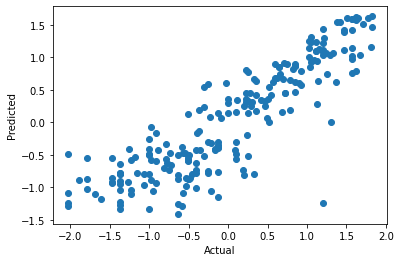

In [154]:
plt.scatter(y_test,rf_regres)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Saving the model

In [155]:
import joblib
joblib.dump(rf_regres,"Global_Power_Plant_regression.pkl")

['Global_Power_Plant_regression.pkl']